In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [2]:
books = pd.read_csv('books.csv',on_bad_lines = 'skip',index_col='bookID')

books.head(3)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [4]:
# removing spaces in column name

books.rename(columns = {'  num_pages':'num_pages'}, inplace = True)

In [5]:
# considering the first author name

books['authors'] = books['authors'].str.replace("(/).*","",regex=True)


In [7]:
# dropping duplicate values

books.drop_duplicates(inplace=True)

In [8]:
# Removing Non-books from the dataset

books.drop(books[books['authors'] == 'NOT A BOOK'].index,axis=0,inplace =True)

# Exploratory Data Analysis

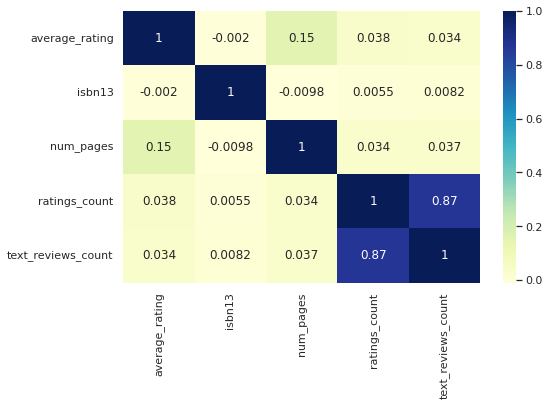

In [9]:
plt.figure(figsize=(8,5))

sns.heatmap(books.corr(),annot=True,cmap="YlGnBu");

We can observe that ratings count is highly correlated to text reviews count

In [10]:
# Authors with most books

most_written = pd.DataFrame(books['authors'].value_counts().head(10))
most_written.columns = ['No. of books']
most_written

,No. of books
William Shakespeare,88
Stephen King,82
J.R.R. Tolkien,51
P.G. Wodehouse,46
Agatha Christie,45
James Patterson,43
Roald Dahl,41
Mercedes Lackey,40
Orson Scott Card,40
Rumiko Takahashi,39


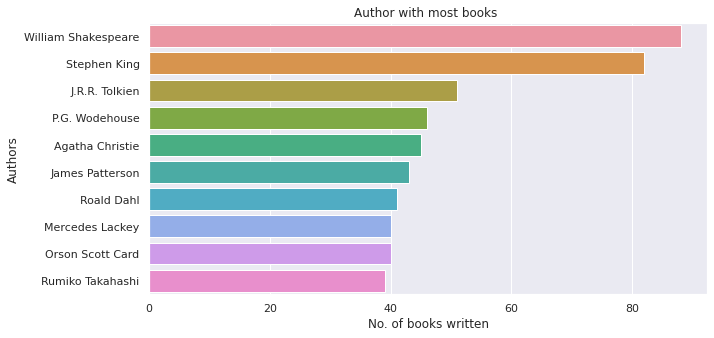

In [11]:
plt.figure(1, figsize=(10, 5))
plt.title("Author with most books ")
sns.countplot(y = "authors", order=books['authors'].value_counts().index[0:10] ,data=books)
plt.xlabel('No. of books written')
plt.ylabel('Authors');

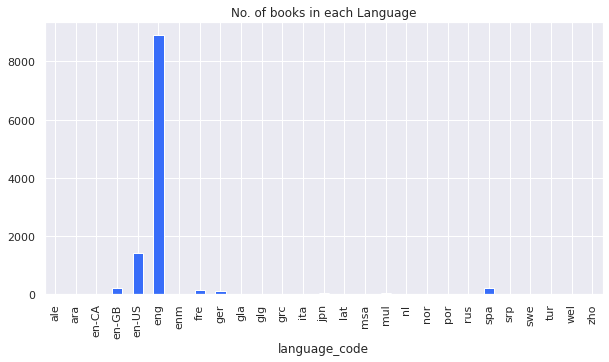

In [33]:
# Distribution of books in Languages

plt.figure(figsize=(10,5))
data=books.groupby('language_code')['title'].count().plot.bar()

plt.title('No. of books in each Language');

In [13]:
# Top rated books

top_rated = books.sort_values('ratings_count', ascending = False).head(10).set_index('title')

pd.DataFrame(top_rated.head(10)['ratings_count'])

,ratings_count
title,
Twilight (Twilight #1),4597666
The Hobbit or There and Back Again,2530894
The Catcher in the Rye,2457092
Angels & Demons (Robert Langdon #1),2418736
Harry Potter and the Prisoner of Azkaban (Harry Potter #3),2339585
Harry Potter and the Chamber of Secrets (Harry Potter #2),2293963
Harry Potter and the Order of the Phoenix (Harry Potter #5),2153167
The Fellowship of the Ring (The Lord of the Rings #1),2128944
Animal Farm,2111750


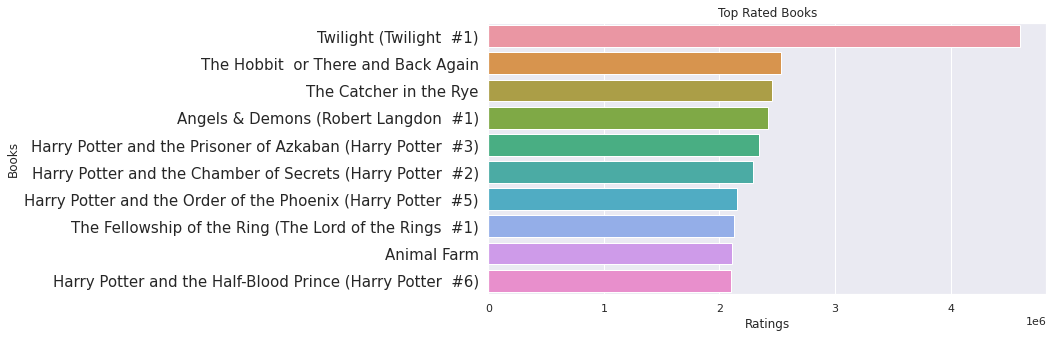

In [14]:
plt.figure(figsize=(10,5))

sns.barplot( x = top_rated['ratings_count'],y = top_rated.index)
plt.title('Top Rated Books')
plt.xlabel('Ratings')
plt.ylabel('Books')
plt.yticks(fontsize = 15);

In [15]:
# Most Review Books

most_reviewed = books.sort_values('text_reviews_count', ascending = False).head(10).set_index('title')

most_reviewed_books = pd.DataFrame(most_reviewed.head(10)['text_reviews_count'])
most_reviewed_books

,text_reviews_count
title,
Twilight (Twilight #1),94265
The Book Thief,86881
The Giver (The Giver #1),56604
The Alchemist,55843
Water for Elephants,52759
The Lightning Thief (Percy Jackson and the Olympians #1),47951
Eat Pray Love,47620
The Glass Castle,46176
The Catcher in the Rye,43499


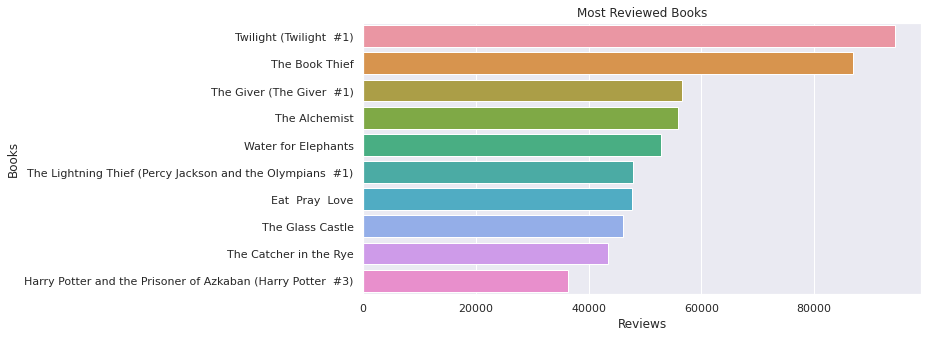

In [16]:
plt.figure(figsize=(10,5))

sns.barplot(x = most_reviewed_books['text_reviews_count'], y = most_reviewed_books.index)
plt.title('Most Reviewed Books')
plt.xlabel('Reviews')
plt.ylabel('Books');

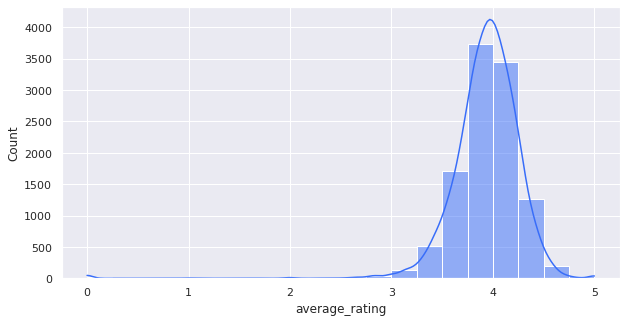

In [17]:
# Ratings distribution

rating= books.average_rating.astype(float)

plt.figure(figsize=(10,5))
sns.histplot(rating, bins=20,kde=True);

In [18]:
# Top 10 Highly Rated Authors

high_rated_df = books[books['average_rating'] > 4.5]

high_rated = pd.DataFrame(high_rated_df.groupby('authors')['title'].count()).sort_values('title',ascending=False).head(10)
high_rated.columns = ['top_rated_books']
high_rated

,top_rated_books
authors,
Hiromu Arakawa,22
J.K. Rowling,12
Hayao Miyazaki,7
Bill Watterson,7
J.R.R. Tolkien,6
Jane Austen,6
Richard P. Feynman,6
Cook's Illustrated Magazine,3
Neil Gaiman,3


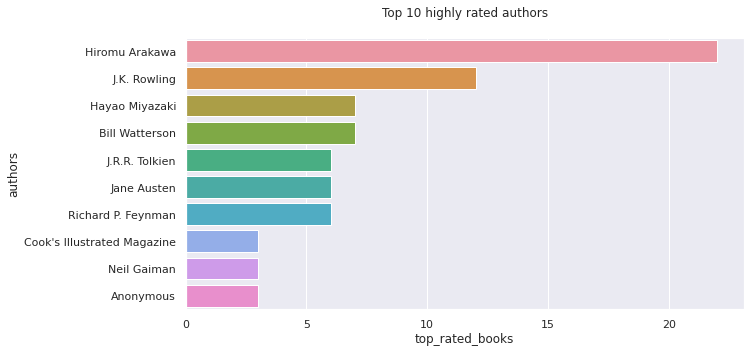

In [19]:
plt.figure(figsize=(10,5))

sns.barplot(x=high_rated['top_rated_books'], y=high_rated.index)
plt.title('Top 10 highly rated authors\n');

# Book Recommendation System

In [20]:
df = books.copy()

In [21]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    return values

df['Ratings_Dist'] = segregation(df)

In [22]:
df.head(2)

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,Ratings_Dist
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,Between 4 and 5
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,Between 4 and 5


In [23]:
# Creating features table

features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)

features.head(5)

,Between 0 and 1,Between 1 and 2,Between 2 and 3,Between 3 and 4,Between 4 and 5,average_rating,ratings_count
bookID,,,,,,,
1,0,0,0,0,1,4.57,2095690
2,0,0,0,0,1,4.49,2153167
4,0,0,0,0,1,4.42,6333
5,0,0,0,0,1,4.56,2339585
8,0,0,0,0,1,4.78,41428


In [24]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [25]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split

model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(features)
distance, indices = model.kneighbors(features)

In [26]:
def recommend(title):
    book_list=[]
    book_id=df[df['title']==title].index[0]

    for book_id in indices[book_id]:
        print(df.iloc[book_id]["title"])


recommend('1984')


A World Lit Only by Fire: The Medieval Mind and the Renaissance: Portrait of an Age
Please Stop Laughing at Me... One Woman's Inspirational Story
Splinter Cell (Tom Clancy's Splinter Cell  #1)
Drop City
Key Lime Pie Murder (Hannah Swensen  #9)
We'll Meet Again


In [27]:
# fetching index from book title
def get_index_from_title(title):
    return df[df["title"]==title].index[0]

get_index_from_title('1984')

5477

In [28]:
# List of all book titles

all_books_titles = list(df.title.values)

In [29]:
# fetching index from a partial book title
def get_id_from_partial_title(partial):
    for title in all_books_titles:
        if partial in title:
            print(title,all_books_titles.index(title))
            
get_id_from_partial_title('Freak')

Freakonomics: A Rogue Economist Explores the Hidden Side of Everything 354
Freakonomics: Un economista políticamente incorrecto explora el lado oculto de lo que nos afecta 355
Freakonomics: A Rogue Economist Explores the Hidden Side of Everything 354
The Lake of Souls (Cirque du Freak #10) 2455
Freak the Mighty (Freak The Mighty  #1) 2456
Word Freak: Heartbreak  Triumph  Genius  and Obsession in the World of Competitive Scrabble Players 2457
Vampire Mountain (Cirque Du Freak  #4) 2458
Jesus Freaks: Stories of Those Who Stood for Jesus  the Ultimate Jesus Freaks (Jesus Freaks  #1) 2459
Trials of Death (Cirque Du Freak  #5) 2460
Sister Freaks: Stories of Women Who Gave Up Everything for God 2461
Freaks of the Storm: From Flying Cows to Stealing Thunder: The World's Strangest True Weather Stories 2462
Freak Show: Presenting Human Oddities for Amusement and Profit 2463
Live Like a Jesus Freak: Spend Today as If It Were Your Last 2464
Freaks!: How to Draw Fantastic Fantasy Creatures 2465
Je

In [30]:
# Recommend similar books

def recommend(title):
        found_id = get_index_from_title(title)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["title"])
            
recommend('Freakonomics: A Rogue Economist Explores the Hidden Side of Everything')

Soul Mates & Twin Flames: The Spiritual Dimension of Love & Relationships (Pocket Guide to Practical Spirituality)
The Assault
Mary Shelley‘s Frankenstein
The Children on the Top Floor
Colonialism and Neocolonialism
